# Loading Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score

## Loading data set into the environment

In [2]:
df=pd.read_excel(r'C:\Users\Lenovo\OneDrive\Desktop\DOTS Tech Assignment\data.xlsx')
df.head(8)

,name,location,latest_position,current_company,latest_edu_place,latest_edu_qual,yrs_exp,volunteer_flag,children_flag,Age,...,Is Student,Is Parent,IsAddressAvailable,IsEmailAvailable,IsPhoneAvailable,District,Marital status_label_encoded,Gender_label_encoded,Nationality_label_encoded,donor_or_not
0,f71069a5840386c6ece104de3f2bafc3ecb1ff37f1bc64...,99406be6f8f8044366aef3271ac4109d0538df39276e9e...,cb3e421b1d1c2c3448f323268f972ee3b2a54cc1021bf4...,3a14097e562c77b201d23978b706f07e52133506bf5902...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,e15274dcfe2d0cb541e8aa23fef7aaaa116bfcbc937d35...,...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,c22cd1ea7268eed0a17f08b05559b6f7939040cf707d5a...,a416ea84421fa7e1351582da48235bac88380a337ec5cb...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,52ebab80b30e4922e932f30f2dd0de3a66dfccdc96c921...,1.0
1,f7e645ca1739c318ae12efa6767cf1e7f38accd55c238c...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,b690285b6e60662df771bc7a6b6ee1cb13f799e3d902ec...,...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,26c9a96ce053a14dd88a71a4830c9cbed7e1fed7e3f3f8...,1.0
2,7a2987f600f343f47c4bd9c1bb704db28517da1e814f95...,ca9f6563c7614c5ef5f033c9aaa1aa21611412da771a91...,27e1c95e64999f594001f3b8fada27406bb96ae8adfded...,78df16cdd1a174c6372267773cf96fc1e7bbcc40a0e935...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,eb1e33e8a81b697b75855af6bfcdbcbf7cbbde9f94962c...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,8ab31b5afaea56114427e1f01b81d001b079a0f59539f6...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,648e5bca018ffe4b6db96361d9b1a5245ee72d27e49269...,1.0
3,e1eb1c05e9cd661690a5eca2566f93ff0a6146bd91025b...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,be683e560cde64bff281f929cab1c6588dc9b7057d3cbf...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,3883138a87732955cea4ec542b22ef82c5342262ca1dab...,...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,c72ae9676454d7cc0014583a9d0a2e28553d5c62f087c7...,a416ea84421fa7e13

## Checking data type and null values in data set

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          1158 non-null   object 
 1   location                      1158 non-null   object 
 2   latest_position               1158 non-null   object 
 3   current_company               1158 non-null   object 
 4   latest_edu_place              1158 non-null   object 
 5   latest_edu_qual               1158 non-null   object 
 6   yrs_exp                       1158 non-null   object 
 7   volunteer_flag                1158 non-null   object 
 8   children_flag                 1158 non-null   object 
 9   Age                           1158 non-null   object 
 10  Has 1 Kid                     1158 non-null   object 
 11  Has 2-3 Kids                  1158 non-null   object 
 12  Has More Than 3 Kids          1158 non-null   object 
 13  Alu

**Conclusion**: Except donor or not all columns are categorical variable/nominal columns. We have to use Encoder to convert categorical values to numberical values.
Also, data set has 1158 rows and 27 columns

In [4]:
df.isnull().sum()

name                            0
location                        0
latest_position                 0
current_company                 0
latest_edu_place                0
latest_edu_qual                 0
yrs_exp                         0
volunteer_flag                  0
children_flag                   0
Age                             0
Has 1 Kid                       0
Has 2-3 Kids                    0
Has More Than 3 Kids            0
Alum Family                     0
Stay with Parents               0
Is Alumnus                      0
Is Staff                        0
Is Student                      0
Is Parent                       0
IsAddressAvailable              0
IsEmailAvailable                0
IsPhoneAvailable                0
District                        0
Marital status_label_encoded    0
Gender_label_encoded            0
Nationality_label_encoded       0
donor_or_not                    2
dtype: int64

*Findings: There are two null/blank values in donor or not column*, Since this is a demogrphic data we cannot replace the blank with any other method like mean, median and KNN. So, we delete those rows

### Deleting blanks

In [5]:
df.dropna(inplace=True)
df.isna().sum()
df.shape

(1156, 27)

*Interpretation: Now deleted the null value contained rows and now data set has only 1156 rows and 27 columns*

## Data Engineering
Since name column has nothing to do with modelling & prediction. So, remove the names column.

In [6]:
df_wn=df.drop('name',axis=1)
df_wn.head(8)

,location,latest_position,current_company,latest_edu_place,latest_edu_qual,yrs_exp,volunteer_flag,children_flag,Age,Has 1 Kid,...,Is Student,Is Parent,IsAddressAvailable,IsEmailAvailable,IsPhoneAvailable,District,Marital status_label_encoded,Gender_label_encoded,Nationality_label_encoded,donor_or_not
0,99406be6f8f8044366aef3271ac4109d0538df39276e9e...,cb3e421b1d1c2c3448f323268f972ee3b2a54cc1021bf4...,3a14097e562c77b201d23978b706f07e52133506bf5902...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,e15274dcfe2d0cb541e8aa23fef7aaaa116bfcbc937d35...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,c22cd1ea7268eed0a17f08b05559b6f7939040cf707d5a...,a416ea84421fa7e1351582da48235bac88380a337ec5cb...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,52ebab80b30e4922e932f30f2dd0de3a66dfccdc96c921...,1.0
1,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,b690285b6e60662df771bc7a6b6ee1cb13f799e3d902ec...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,26c9a96ce053a14dd88a71a4830c9cbed7e1fed7e3f3f8...,1.0
2,ca9f6563c7614c5ef5f033c9aaa1aa21611412da771a91...,27e1c95e64999f594001f3b8fada27406bb96ae8adfded...,78df16cdd1a174c6372267773cf96fc1e7bbcc40a0e935...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,eb1e33e8a81b697b75855af6bfcdbcbf7cbbde9f94962c...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,8ab31b5afaea56114427e1f01b81d001b079a0f59539f6...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,648e5bca018ffe4b6db96361d9b1a5245ee72d27e49269...,1.0
3,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,be683e560cde64bff281f929cab1c6588dc9b7057d3cbf...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,3883138a87732955cea4ec542b22ef82c5342262ca1dab...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,c72ae9676454d7cc0014583a9d0a2e28553d5c62f087c7...,a416ea84421f

In [7]:
#In order to use label encoder for categorical variables, extracting column names for encoding.
df_wn.columns.values

array(['location', 'latest_position', 'current_company',
       'latest_edu_place', 'latest_edu_qual', 'yrs_exp', 'volunteer_flag',
       'children_flag', 'Age', 'Has 1 Kid', 'Has 2-3 Kids',
       'Has More Than 3 Kids', 'Alum Family', 'Stay with Parents',
       'Is Alumnus', 'Is Staff', 'Is Student', 'Is Parent',
       'IsAddressAvailable', 'IsEmailAvailable', 'IsPhoneAvailable',
       'District', 'Marital status_label_encoded', 'Gender_label_encoded',
       'Nationality_label_encoded', 'donor_or_not'], dtype=object)

In [8]:
##Creating encoding instance as le
le=LabelEncoder()
label_cols=['location', 'latest_position', 'current_company','latest_edu_place', 'latest_edu_qual', 'yrs_exp', 'volunteer_flag','children_flag', 'Age', 'Has 1 Kid', 'Has 2-3 Kids','Has More Than 3 Kids', 'Alum Family', 'Stay with Parents','Is Alumnus', 'Is Staff', 'Is Student', 'Is Parent','IsAddressAvailable', 'IsEmailAvailable', 'IsPhoneAvailable','District', 'Marital status_label_encoded', 'Gender_label_encoded','Nationality_label_encoded']
df_wn[label_cols]= df_wn[label_cols].apply(le.fit_transform)
df_wn.head(8)

,location,latest_position,current_company,latest_edu_place,latest_edu_qual,yrs_exp,volunteer_flag,children_flag,Age,Has 1 Kid,...,Is Student,Is Parent,IsAddressAvailable,IsEmailAvailable,IsPhoneAvailable,District,Marital status_label_encoded,Gender_label_encoded,Nationality_label_encoded,donor_or_not
0,29,657,204,108,4,39,1,1,44,0,...,0,0,1,1,1,18,2,1,6,1.0
1,30,505,552,108,4,39,1,1,34,0,...,0,0,1,1,1,13,3,1,4,1.0
2,42,110,427,79,1,43,1,1,29,0,...,0,0,1,0,1,12,3,0,10,1.0
3,30,225,674,108,4,39,1,1,10,0,...,0,0,1,1,1,19,2,1,2,1.0
4,42,425,58,95,3,33,1,1,44,0,...,0,0,1,1,1,3,2,1,2,1.0
5,30,505,552,108,4,39,1,1,29,0,...,0,0,1,1,1,25,0,1,10,1.0
6,30,311,352,108,4,39,1,1,28,0,...,0,0,1,1,1,15,3,1,6,1.0
7,42,351,116,104,0,8,0,1,37,0,...,0,0,1,1,1,18,3,0,4,1.0


Now all catagorical variables has been changed to numerical values. Now can determine which method is best for prediction.

In [9]:
#Data Screening
df_wn.nunique()

location                         48
latest_position                 822
current_company                 900
latest_edu_place                140
latest_edu_qual                   5
yrs_exp                          46
volunteer_flag                    2
children_flag                     2
Age                              51
Has 1 Kid                         2
Has 2-3 Kids                      2
Has More Than 3 Kids              1
Alum Family                       2
Stay with Parents                 2
Is Alumnus                        2
Is Staff                          2
Is Student                        2
Is Parent                         1
IsAddressAvailable                2
IsEmailAvailable                  2
IsPhoneAvailable                  2
District                         28
Marital status_label_encoded      4
Gender_label_encoded              3
Nationality_label_encoded        22
donor_or_not                      2
dtype: int64

In [10]:
df_wn['Marital status_label_encoded'].value_counts()

2    666
3    344
0    144
1      2
Name: Marital status_label_encoded, dtype: int64

In [11]:
df_wn['Marital status_label_encoded'].value_counts()

2    666
3    344
0    144
1      2
Name: Marital status_label_encoded, dtype: int64

Generally we know that in martial status column can assume that the have four options are: "Single, Married, Divorced, Not specified". Similarly in gender we can assume those are "Male, Female, Not specified/Trans"
And all other looks good.

In [12]:
#Here target column is donated or nor so rename that column.
df_wn.rename(columns={'donor_or_not':'Target'},inplace=True)  
df_wn.head(8)

,location,latest_position,current_company,latest_edu_place,latest_edu_qual,yrs_exp,volunteer_flag,children_flag,Age,Has 1 Kid,...,Is Student,Is Parent,IsAddressAvailable,IsEmailAvailable,IsPhoneAvailable,District,Marital status_label_encoded,Gender_label_encoded,Nationality_label_encoded,Target
0,29,657,204,108,4,39,1,1,44,0,...,0,0,1,1,1,18,2,1,6,1.0
1,30,505,552,108,4,39,1,1,34,0,...,0,0,1,1,1,13,3,1,4,1.0
2,42,110,427,79,1,43,1,1,29,0,...,0,0,1,0,1,12,3,0,10,1.0
3,30,225,674,108,4,39,1,1,10,0,...,0,0,1,1,1,19,2,1,2,1.0
4,42,425,58,95,3,33,1,1,44,0,...,0,0,1,1,1,3,2,1,2,1.0
5,30,505,552,108,4,39,1,1,29,0,...,0,0,1,1,1,25,0,1,10,1.0
6,30,311,352,108,4,39,1,1,28,0,...,0,0,1,1,1,15,3,1,6,1.0
7,42,351,116,104,0,8,0,1,37,0,...,0,0,1,1,1,18,3,0,4,1.0


In [13]:
df_wn["Target"].value_counts()

1.0    1141
0.0      15
Name: Target, dtype: int64

Assume that in Target column 1: Donated and 0: Not Donated.
Also, we have 1141 individuals recently donated and 15 individuals not donated.
## Correlation Matrix

<AxesSubplot:>

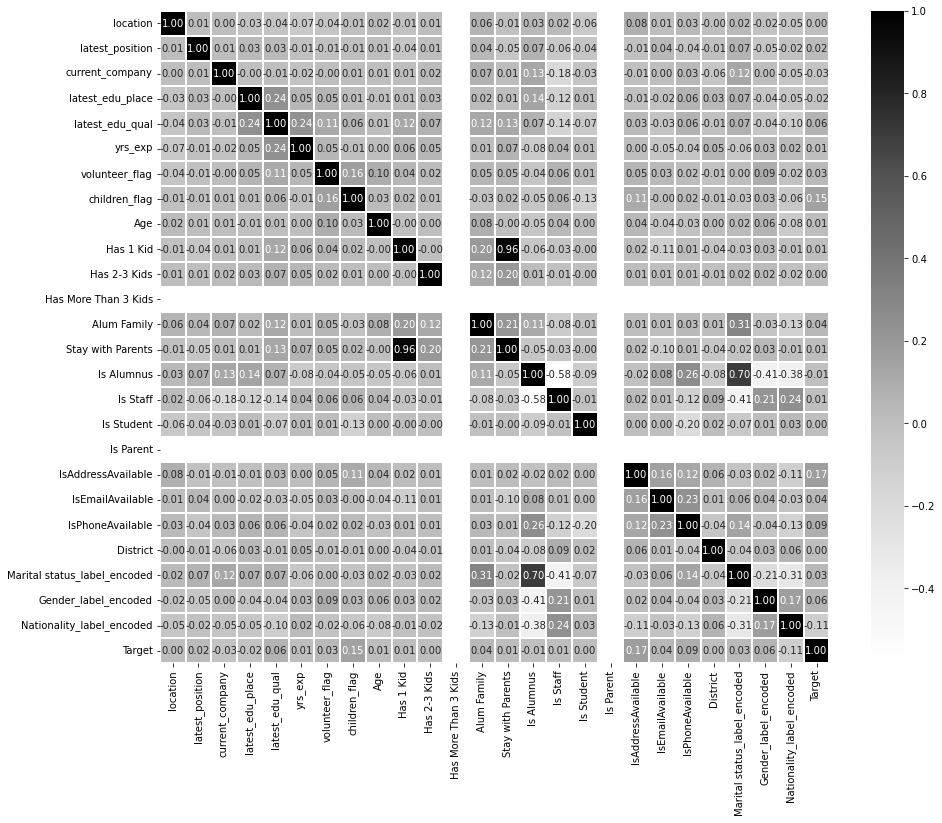

In [14]:
correlation_matrix=df_wn.corr()
f, ax = plt.subplots(figsize =(15, 12)) 
sns.heatmap(correlation_matrix, ax = ax, cmap ="Greys", linewidths = 0.1,fmt = ".2f",annot=True)

**Interpretation**: From the above matrix it is clear that we have variable those are negatively and postively correlated with Target variable.
In our case, we focus on which features have strong positive or negative correlation with the Target feature.
## Spliting data set into train & test set for modelling.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_wn.drop(columns=['Target']),df_wn.Target,test_size=0.2,random_state=42)

### tpot 
TPOT is a Python Automated Machine Learning tool that optimizes machine learning pipelines using genetic programming.</br>
TPOT will automatically explore hundreds of possible pipelines to find the best one for our dataset. Note, the outcome of this search will be a scikit-learn pipeline, meaning it will include any pre-processing steps as well as the model.</br>
</br>
We are using TPOT to help us zero in on one model that we can then explore and optimize further.

In [16]:
# Instance for TPOTClassifier
tpot = TPOTClassifier(generations=5,population_size=20,verbosity=2,scoring='roc_auc',random_state=42,disable_update_check=True,config_dict='TPOT light')
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7300906743529694

Generation 2 - Current best internal CV score: 0.7300906743529694

Generation 3 - Current best internal CV score: 0.7340359094457456

Generation 4 - Current best internal CV score: 0.7625683060109291

Generation 5 - Current best internal CV score: 0.7625683060109291

Best pipeline: KNeighborsClassifier(MinMaxScaler(input_matrix), n_neighbors=73, p=1, weights=distance)


TPOTClassifier(config_dict='TPOT light', disable_update_check=True,
               generations=5, population_size=20, random_state=42,
               scoring='roc_auc', verbosity=2)

In [17]:
#Calculating the degree of separability, a.k.a AUC score
# AUC score for tpot model
tpot_auc_score = roc_auc_score(y_test, tpot.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')


AUC score: 0.7840


AUC score is between 0 and 1 or 1% and 100%. And if AUC score is atleast 70% is good to go. We have 78.4 which is good for classifier and tpot suggest MinMax scaling for feature data engineering and KNN classifier for modelling.

In [18]:
#Feature and modelling to be done:
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    # Print idx and transform
    print(f'{idx}. {transform}')


Best pipeline steps:
1. MinMaxScaler()
2. KNeighborsClassifier(n_neighbors=73, p=1, weights='distance')


### Data Featuring.

In [19]:
##As tpot Automated ML tool sugegest, creating instance for min-max scaling data
scaler=MinMaxScaler()
df_scaled = scaler.fit_transform(df_wn.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['location', 'latest_position', 'current_company','latest_edu_place', 'latest_edu_qual', 'yrs_exp', 'volunteer_flag','children_flag', 'Age', 'Has 1 Kid', 'Has 2-3 Kids','Has More Than 3 Kids', 'Alum Family', 'Stay with Parents','Is Alumnus', 'Is Staff', 'Is Student', 'Is Parent','IsAddressAvailable', 'IsEmailAvailable', 'IsPhoneAvailable','District', 'Marital status_label_encoded', 'Gender_label_encoded','Nationality_label_encoded','Target'])
df_scaled.head(8)

,location,latest_position,current_company,latest_edu_place,latest_edu_qual,yrs_exp,volunteer_flag,children_flag,Age,Has 1 Kid,...,Is Student,Is Parent,IsAddressAvailable,IsEmailAvailable,IsPhoneAvailable,District,Marital status_label_encoded,Gender_label_encoded,Nationality_label_encoded,Target
0,0.617021,0.800244,0.226919,0.776978,1.00,0.866667,1.0,1.0,0.88,0.0,...,0.0,0.0,1.0,1.0,1.0,0.666667,0.666667,0.5,0.285714,1.0
1,0.638298,0.615104,0.614016,0.776978,1.00,0.866667,1.0,1.0,0.68,0.0,...,0.0,0.0,1.0,1.0,1.0,0.481481,1.000000,0.5,0.190476,1.0
2,0.893617,0.133983,0.474972,0.568345,0.25,0.955556,1.0,1.0,0.58,0.0,...,0.0,0.0,1.0,0.0,1.0,0.444444,1.000000,0.0,0.476190,1.0
3,0.638298,0.274056,0.749722,0.776978,1.00,0.866667,1.0,1.0,0.20,0.0,...,0.0,0.0,1.0,1.0,1.0,0.703704,0.666667,0.5,0.095238,1.0
4,0.893617,0.517661,0.064516,0.683453,0.75,0.733333,1.0,1.0,0.88,0.0,...,0.0,0.0,1.0,1.0,1.0,0.111111,0.666667,0.5,0.095238,1.0
5,0.638298,0.615104,0.614016,0.776978,1.00,0.866667,1.0,1.0,0.58,0.0,...,0.0,0.0,1.0,1.0,1.0,0.925926,0.000000,0.5,0.476190,1.0
6,0.638298,0.378806,0.391546,0.776978,1.00,0.866667,1.0,1.0,0.56,0.0,...,0.0,0.0,1.0,1.0,1.0,0.555556,1.000000,0.5,0.285714,1.0
7,0.893617,0.427527,0.129032,0.748201,0.00,0.177778,0.0,1.0,0.74,0.0,...,0.0,0.0,1.0,1.0,1.0,0.666667,1.000000,0.0,0.190476,1.0


In [20]:
#Again Splitting to train and test set of featured datas
X_train, X_test, y_train, y_test = train_test_split(df_scaled.drop(columns=['Target']),df_scaled.Target,test_size=0.2,random_state=42)

## Modelling/Classification

In [21]:
##As tpot Automated ML tool sugegest, creating instance for KNN for modelling.
knn_reg=KNeighborsClassifier(n_neighbors=73, p=1, weights='distance')
knn_reg.fit(X_train,y_train)
pred=knn_reg.predict(X_test)
confusion_matrix(pred,y_test)

array([[  0,   0],
       [  4, 228]], dtype=int64)

*Interpretation: Confusion Matrix states that false-false = 0, false-True=0, True-false=4 and true-true=228.


In [22]:
KNN_auc_score = roc_auc_score(y_test, knn_reg.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {KNN_auc_score:.4f}')


AUC score: 0.7840


n this notebook, we explored automatic model selection using TPOT and AUC score we got was 0.7840. </br>
**PS**: May be removing outliers might help to increase AUC score, since this is a demographic data set and EDA and outliers are meaning less here. 

## Extracting data from main file of individuals who doesn't donate yet.

In [24]:
df_not_donor=df_wn.loc[df_wn['Target'] == 0.0]
df_not_donor.head(15)

,location,latest_position,current_company,latest_edu_place,latest_edu_qual,yrs_exp,volunteer_flag,children_flag,Age,Has 1 Kid,...,Is Student,Is Parent,IsAddressAvailable,IsEmailAvailable,IsPhoneAvailable,District,Marital status_label_encoded,Gender_label_encoded,Nationality_label_encoded,Target
16,42,330,190,2,3,19,1,1,48,0,...,0,0,1,1,1,25,2,1,2,0.0
150,42,46,792,79,1,31,0,0,18,0,...,0,0,0,1,1,13,2,0,16,0.0
152,42,480,701,79,1,8,1,1,10,0,...,0,0,1,1,1,5,2,1,2,0.0
153,42,505,672,104,2,31,1,1,10,0,...,0,0,1,1,1,17,2,1,2,0.0
155,27,806,435,104,2,31,1,0,37,0,...,0,0,0,1,1,13,2,1,16,0.0
157,42,459,592,104,2,28,1,1,18,0,...,0,0,1,1,1,9,2,0,19,0.0
158,42,420,374,104,2,31,1,1,18,0,...,0,0,1,1,1,5,2,0,2,0.0
159,42,246,5,104,3,31,1,1,16,0,...,0,0,1,1,0,19,2,0,2,0.0
161,42,438,613,104,3,31,0,0,45,0,...,0,0,0,1,1,13,2,1,10,0.0
170,42,489,362,104,2,31,0,0,8,0,...,0,0,1,1,1,13,2,1,16,0.0


In [26]:
df_scaled_not_donor = scaler.fit_transform(df_not_donor.to_numpy())
df_scaled_not_donor = pd.DataFrame(df_scaled_not_donor, columns=['location', 'latest_position', 'current_company','latest_edu_place', 'latest_edu_qual', 'yrs_exp', 'volunteer_flag','children_flag', 'Age', 'Has 1 Kid', 'Has 2-3 Kids','Has More Than 3 Kids', 'Alum Family', 'Stay with Parents','Is Alumnus', 'Is Staff', 'Is Student', 'Is Parent','IsAddressAvailable', 'IsEmailAvailable', 'IsPhoneAvailable','District', 'Marital status_label_encoded', 'Gender_label_encoded','Nationality_label_encoded','Target'])

In [27]:
test=df_scaled_not_donor.drop(columns=['Target'])
test.head(15)

,location,latest_position,current_company,latest_edu_place,latest_edu_qual,yrs_exp,volunteer_flag,children_flag,Age,Has 1 Kid,...,Is Staff,Is Student,Is Parent,IsAddressAvailable,IsEmailAvailable,IsPhoneAvailable,District,Marital status_label_encoded,Gender_label_encoded,Nationality_label_encoded
0,1.000000,0.373684,0.217647,0.000000,1.000000,0.478261,1.0,1.0,1.000,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.00,0.666667,1.0,0.000000
1,1.000000,0.000000,0.925882,0.592308,0.333333,1.000000,0.0,0.0,0.250,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.40,0.666667,0.0,0.823529
2,1.000000,0.571053,0.818824,0.592308,0.333333,0.000000,1.0,1.0,0.050,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.00,0.666667,1.0,0.000000
3,1.000000,0.603947,0.784706,0.784615,0.666667,1.000000,1.0,1.0,0.050,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.60,0.666667,1.0,0.000000
4,0.000000,1.000000,0.505882,0.784615,0.666667,1.000000,1.0,0.0,0.725,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.40,0.666667,1.0,0.823529
5,1.000000,0.543421,0.690588,0.784615,0.666667,0.869565,1.0,1.0,0.250,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.20,0.666667,0.0,1.000000
6,1.000000,0.492105,0.434118,0.784615,0.666667,1.000000,1.0,1.0,0.250,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.00,0.666667,0.0,0.000000
7,1.000000,0.263158,0.000000,0.784615,1.000000,1.000000,1.0,1.0,0.200,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.70,0.666667,0.0,0.000000
8,1.000000,0.515789,0.715294,0.784615,1.000000,1.000000,0.0,0.0,0.925,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.40,0.666667,1.0,0.470588
9,1.000000,0.582895,0.420000,0.784615,0.666667,1.000000,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.40,0.666667,1.0,0.823529


In [28]:
#Predicting using the extracted data.
pred=knn_reg.predict(test)
pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## Create a dataframe using existing data and predicted data.

In [30]:
df_not_donor_withnames=df.loc[df_wn['Target'] == 0.0]
final=df_not_donor_withnames.assign(Prediction=pred)
final

,name,location,latest_position,current_company,latest_edu_place,latest_edu_qual,yrs_exp,volunteer_flag,children_flag,Age,...,Is Parent,IsAddressAvailable,IsEmailAvailable,IsPhoneAvailable,District,Marital status_label_encoded,Gender_label_encoded,Nationality_label_encoded,donor_or_not,Prediction
16,2b429a7047b5adb14e529bffd08b87e87a9129bda4617e...,ca9f6563c7614c5ef5f033c9aaa1aa21611412da771a91...,69dfc3ba29d821be3650807bb1efbd8bbc12c1a8692066...,37670d3ba700d0ebe5f6610a254b8f0f27ab1fae21a5a5...,038b46ecafa9ce2853c0e6ca87ab55c763f6708c23f1c0...,b0a088422375d451e34aa118a4b44e31d02c6236e108da...,6b51d431df5d7f141cbececcf79edf3dd861c3b4069f0b...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,f85f0b0b202527348d18a78706e3ff04eddb2022895655...,...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,e4658389f3e9af055d9d349c5e68122e26dbce056fe0da...,a416ea84421fa7e1351582da48235bac88380a337ec5cb...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,1f4d86b1e0415f97659988ec13c7753c4bffc5f95d373c...,0.0,1.0
150,0c36ed5088029886be0f3df776ca15f5328dca29f75b29...,ca9f6563c7614c5ef5f033c9aaa1aa21611412da771a91...,0f0cf5177b621d977d079b245b853f06a3ef414bb40939...,dff1a72a7133a222ba482de99c053ab3c3c4eb435c8f10...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,18f5384d58bcb1bba0bcd9e6a6781d1a6ac2cc280c330e...,18f5384d58bcb1bba0bcd9e6a6781d1a6ac2cc280c330e...,53519e43db90bd08ff4459fd23fc944324ffb7d8f542cc...,...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,a416ea84421fa7e1351582da48235bac88380a337ec5cb...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,c23682d6bdb6c3180520659f65b92ef5b93404256af914...,0.0,1.0
152,fbe36a78484898f73345439f2bc314d0cece37f5356d48...,ca9f6563c7614c5ef5f033c9aaa1aa21611412da771a91...,92f8d0d86d645b75564ce8c118af39784f28903d3682cd...,c7bac46904be785cd0c965bf5659610044f0cdb4cbb02d...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,4a44dc15364204a80fe80e9039455cc1608281820fe2b2...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,3883138a87732955cea4ec542b22ef82c5342262ca1dab...,...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,566afbb607a8f17b7cdf2d7f1632a2a810c06b128e8b81...,a416ea84421fa7e1351582da48235bac88380a337ec5cb...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,1f4d86b1e0415f97659988ec13c7753c4bffc5f95d373c...,0.0,1.0
153,ab6df4378361363e89fa14731ab7099268cebb6a07e5f1...,ca9f6563c7614c5ef5f033c9aaa1aa21611412da771a91...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,bda584056eb9957d6c681e00079eff36fec289e2a0432a...,d81ffc4257cf3d17ac099f56a8fee8604a76b53c8aaa76...,9c0736a282d77e28ea176f88efa2ed4d316a36f21e5f1e...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,3883138a87732955cea4ec542b22ef82c5342262ca1dab...,...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,be293da5be477078cbeee7feef7b384f879f730ef26f51...,a416ea84421fa7e1351582da48235bac88380a337ec5cb...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,1f4d86b1e0415f97659988ec13c7753c4bffc5f95d373c...,0.0,1.0
155,59a2e9f5c74436dbe2e02bc8177c34b1665a

**Conclusion: The model suggest that probabily (more success % rate) with proper approach to those who doesn't have donation history will donate this time.